# พลอตข้อมูล anomaly ของความชื้นสัมพัทธ์จากข้อมูล ERA5
* แบบฝึกหัดนี้นิสิตจะได้ฝึกหัด
    * การอ่านข้อมูล ERA5 เข้ามาใน XARRAY
    * การพลอตแผนที่อุณหภูมิที่ระดับ 850 hPa ของเดือนที่นิสิตสนใจ
    * การคำนวณค่าอุณหภูมิเฉลี่ยเชิงภูมิอากาศวิทยา
    * การคำนวณค่า anomaly relative humidity
 
 
 * สูตรในการคำนวณ anomalies https://iridl.ldeo.columbia.edu/dochelp/QA/Basic/anomalies.html นั่นคือ anomaly = X -Climatological mean

## 1. อ่านไลบราลี

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
df = xr.open_dataset('era5_monthly_mean_globe.nc')
print(df)

<xarray.Dataset>
Dimensions:    (longitude: 1440, latitude: 721, time: 80)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * time       (time) datetime64[ns] 1981-01-01 1981-07-01 ... 2020-07-01
Data variables:
    z          (time, latitude, longitude) float32 ...
    r          (time, latitude, longitude) float32 ...
    t          (time, latitude, longitude) float32 ...
    u          (time, latitude, longitude) float32 ...
    v          (time, latitude, longitude) float32 ...
    vo         (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2022-04-07 04:35:51 GMT by grib_to_netcdf-2.24.3: /opt/ecmw...


## 2.เก็บค่าตัวแปรที่ต้องการนำไปใช้งาน

In [3]:
lon_ = df.longitude
lat_ = df.latitude
time_  = df.time
RH_  = df.r #ความชื้นสัมพัทฑ์ relative humidity
print(RH_.shape)

(80, 721, 1440)


In [4]:
RH_

<xarray.DataArray 'r' (time: 80, latitude: 721, longitude: 1440)>
[83059200 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * time       (time) datetime64[ns] 1981-01-01 1981-07-01 ... 2020-07-01
Attributes:
    units:          %
    long_name:      Relative humidity
    standard_name:  relative_humidity

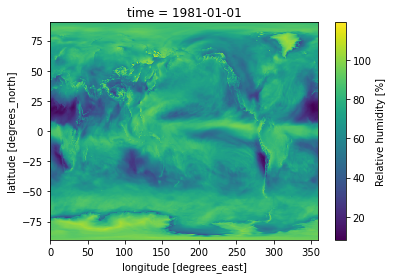

In [5]:
RH_[0,:,:].plot() #พลอตอย่างง่าย กับข้อมูลช่วงเวลาแรก

## 3. พลอตข้อมูลความชื้นสัมพัทธ์เดือนที่สนใจ ด้วยการเลือกช่วงเวลา

### 3.1 ความชื้นสัมพัทธ์เดือนกรกฎาคม 2011

In [6]:
RH_jul=RH_.sel(time='2011-07-01') #ความชื้นสัมพัทธ์เดือนกรกฎาคม ของปีที่เกิดน้ำท่วมใหญ่ในประเทศไทย 2554

In [7]:
RH_jul

<xarray.DataArray 'r' (latitude: 721, longitude: 1440)>
[1038240 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
    time       datetime64[ns] 2011-07-01
Attributes:
    units:          %
    long_name:      Relative humidity
    standard_name:  relative_humidity

C:\Users\Admin\anaconda3\envs\metpy\lib\site-packages\cartopy\crs.py:825: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
C:\Users\Admin\anaconda3\envs\metpy\lib\site-packages\cartopy\crs.py:877: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
C:\Users\Admin\anaconda3\envs\metpy\lib\site-packages\cartopy\crs.py:944: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:
C:\Users\Admin\anaconda3\envs\metpy\lib\site-packages\cartopy\cr

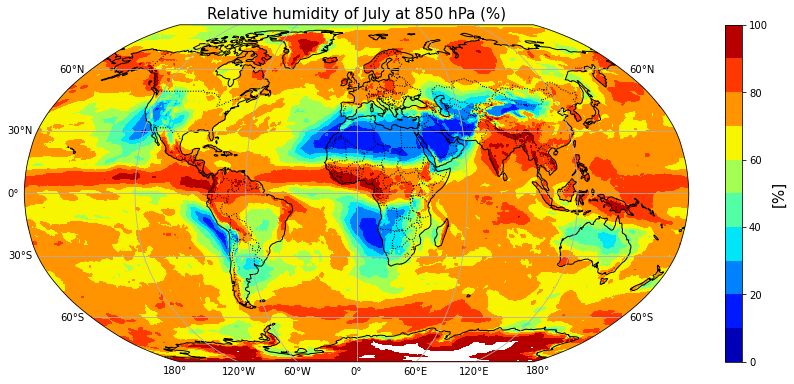

In [8]:
## พลอตแผนที่ความชื้นสัมพัทธ์ของเดือนที่สนใจ ระดับความกดบรรยากาศ 850 hPa  
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point
import cartopy.feature as cfeat

plt.figure(figsize=(13,6.2))
rh_cyc, lon_cyc = add_cyclic_point(RH_jul, coord=lon_) #Changing the longitude from 0º – 360º to -180 – 180 จาก https://geoclimatologyblog.wordpress.com/page/2/


ax = plt.subplot(111, projection=ccrs.Robinson())
max_ = 101.0
min_ = 0.0
#max_ = 42
#$min_ = -40
vstep = 10.0
levels = np.arange(min_, max_, vstep)
rh_ = ax.contourf(lon_cyc,\
                                 lat_,\
                                 rh_cyc,\
                                 levels,\
                                 transform=ccrs.PlateCarree(),\
                                 cmap='jet')


ax.coastlines(resolution='110m', color='black', linewidth=1) #เพิ่มแนวชายฝั่งจาก pyplot
ax.add_feature(cfeat.BORDERS, linestyle=':') #เพิ่มขอบเขตประเทศจาก cartopy

#เซตค่าชื่อกริด การแสดงกริดเส้นโครง
gl = ax.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False

#พลอต color bar
# คำนวณมิติข้อมูล (height_of_image / width_of_image)
im_ratio = rh_cyc.shape[0]/rh_cyc.shape[1]
cbar = plt.colorbar(rh_,fraction=0.047*im_ratio)
cbar.set_label('[%]', fontsize=15)


plt.title('Relative humidity of July at 850 hPa (%)', fontsize=15)
plt.show()

### แปลผล
* เดือนกรกฏาคมในซีกโลกเหนือเป็นฤดูร้อน ในเขตร้อนเป็นฤดูมรสุม ในประเทศไทยเป็นฤดูฝน ความชื้นสัมพัทธ์สูง เช่นเดียวกันกับในลุ่มแม่น้ำคองโกและลุ่มแม่น้ำอเมซอน ส่วนในแถบแอฟริกาตอนบนซึ่งเป็นเขตทะเลทรายซาฮาราเป็นเขตที่มีความชื้นสัมพัทธ์ต่ำ ต่อเนื่องมาจนถึงในตะวันออกกลางจนถึงทางตะวันตกของจีน จนถึงแนวรอยต่อระหว่างมองโกเลียในกับมองโกเลียซึ่งเป็นเขตทะเลทรายโกบี ในทางตะวันตกของสหรัฐอเมริกาก็พบว่ามีความชื้นสัมพัทธ์ที่ต่ำมากเช่นกัน
* ข้อมูลที่ใช้อยู่ในระดับความกดบรรยากาศที่ 850 hPa

## 4.คำนวณหาค่าอุณหภูมิเฉลี่ยเชิงภูมิอากาศวิทยา 30 ปี ตั้งแต่ 1991-2020 ของเดือนกรกฏาคม

In [9]:
# เลือกโดยใช้วิธีการ groups ใน xarray เอาเฉพาะเดือนมาก่อน เพื่อให้ได้ index เดือนมา
month_idxs=df.groupby('time.month').groups
# สกัดค่า index ของเดือนที่ต้องการ ในที่นี้ใช้ 7 แทนเดือนกรกฏาคม เนื่องจาก 1 คือเดือนมกราคม
jul_idxs=month_idxs[7]
# เมื่อได้ค่า index ของเดือนกรกฎาคม ให้นำมาใช้สกัดข้อมูลเดือนกรกฎาคมได้เลย
ds_jul=df.isel(time=jul_idxs)

In [10]:
ds_jul

<xarray.Dataset>
Dimensions:    (longitude: 1440, latitude: 721, time: 40)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * time       (time) datetime64[ns] 1981-07-01 1982-07-01 ... 2020-07-01
Data variables:
    z          (time, latitude, longitude) float32 ...
    r          (time, latitude, longitude) float32 ...
    t          (time, latitude, longitude) float32 ...
    u          (time, latitude, longitude) float32 ...
    v          (time, latitude, longitude) float32 ...
    vo         (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2022-04-07 04:35:51 GMT by grib_to_netcdf-2.24.3: /opt/ecmw...

In [11]:
RH_  = ds_jul.r #ความชื้นสัมพัทธ์

In [12]:
RH_

<xarray.DataArray 'r' (time: 40, latitude: 721, longitude: 1440)>
[41529600 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * time       (time) datetime64[ns] 1981-07-01 1982-07-01 ... 2020-07-01
Attributes:
    units:          %
    long_name:      Relative humidity
    standard_name:  relative_humidity

In [13]:
RH_30yrs = RH_.loc['1991-07':'2020-07']

In [14]:
RH_30yrs

<xarray.DataArray 'r' (time: 30, latitude: 721, longitude: 1440)>
[31147200 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * time       (time) datetime64[ns] 1991-07-01 1992-07-01 ... 2020-07-01
Attributes:
    units:          %
    long_name:      Relative humidity
    standard_name:  relative_humidity

In [15]:
RH_30yrs.shape

(30, 721, 1440)

In [16]:
# หาค่า mean เนื่องจากตอนนี้ข้อมูลเป็นแบบ data array จึงต้องใช้คำสั่งใน numpy แต่ถ้าเป็น dataset จะใช้ของ xarray ได้เลย
RH_30yrs_mean = np.mean(RH_30yrs,axis=0)

### 4.1 พลอตแผนที่ความชื้นสัมพัทธ์เฉลี่ยเชิงภูมิอากาศวิทยา 30 ปี ตั้งแต่ 1991-2020 ของเดือนกรกฏาคม


C:\Users\Admin\anaconda3\envs\metpy\lib\site-packages\cartopy\crs.py:825: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
C:\Users\Admin\anaconda3\envs\metpy\lib\site-packages\cartopy\crs.py:877: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
C:\Users\Admin\anaconda3\envs\metpy\lib\site-packages\cartopy\crs.py:944: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:
C:\Users\Admin\anaconda3\envs\metpy\lib\site-packages\cartopy\cr

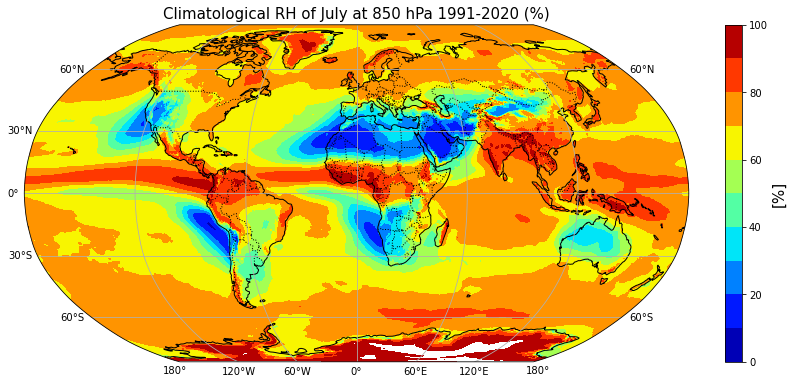

In [17]:
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point
import cartopy.feature as cfeat

plt.figure(figsize=(13,6.2))
rh_cyc, lon_cyc = add_cyclic_point(RH_30yrs_mean, coord=lon_) #Changing the longitude from 0º – 360º to -180 – 180 จาก https://geoclimatologyblog.wordpress.com/page/2/


ax = plt.subplot(111, projection=ccrs.Robinson())
#max_ = np.round((np.max(uw_cyc)))+2
#min_ = np.round((np.min(uw_cyc)))
max_ = 101.0
min_ = 0.0
vstep = 10.0
levels = np.arange(min_, max_, vstep)
rh_ = ax.contourf(lon_cyc,\
                                 lat_,\
                                 rh_cyc,\
                                 levels,\
                                 transform=ccrs.PlateCarree(),\
                                 cmap='jet')


ax.coastlines(resolution='110m', color='black', linewidth=1) #เพิ่มแนวชายฝั่งจาก pyplot
ax.add_feature(cfeat.BORDERS, linestyle=':') #เพิ่มขอบเขตประเทศจาก cartopy

#เซตค่าชื่อกริด การแสดงกริดเส้นโครง
gl = ax.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False

#พลอต color bar
# คำนวณมิติข้อมูล (height_of_image / width_of_image)
im_ratio = rh_cyc.shape[0]/rh_cyc.shape[1]
cbar = plt.colorbar(rh_,fraction=0.047*im_ratio)
cbar.set_label('[%]', fontsize=15)


plt.title('Climatological RH of July at 850 hPa 1991-2020 (%)', fontsize=15)
plt.show()

### 4.2 พลอตค่า RH anomaly ของปี 2011 เทียบกับค่าความชื้นสัมพัทธ์เฉลี่ยเชิงภูมิอากาศ 30 ปี ของเดือนกรกฎาคม

In [18]:
anomaly_jul=RH_jul - RH_30yrs_mean

In [19]:
anomaly_jul

<xarray.DataArray 'r' (latitude: 721, longitude: 1440)>
array([[-16.931973  , -16.931973  , -16.931973  , ..., -16.931973  ,
        -16.931973  , -16.931973  ],
       [-17.579681  , -17.579006  , -17.576874  , ..., -17.579002  ,
        -17.578518  , -17.579868  ],
       [-17.912247  , -17.904388  , -17.897999  , ..., -17.93179   ,
        -17.923637  , -17.918877  ],
       ...,
       [ -0.7736969 ,  -0.7746506 ,  -0.7793274 , ...,  -0.7674637 ,
         -0.7685547 ,  -0.7729645 ],
       [  0.10003662,   0.0994339 ,   0.09888458, ...,   0.10002899,
          0.09936523,   0.09900665],
       [ -0.81137085,  -0.81137085,  -0.81137085, ...,  -0.81137085,
         -0.81137085,  -0.81137085]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
    time       datetime64[ns] 2011-07-01

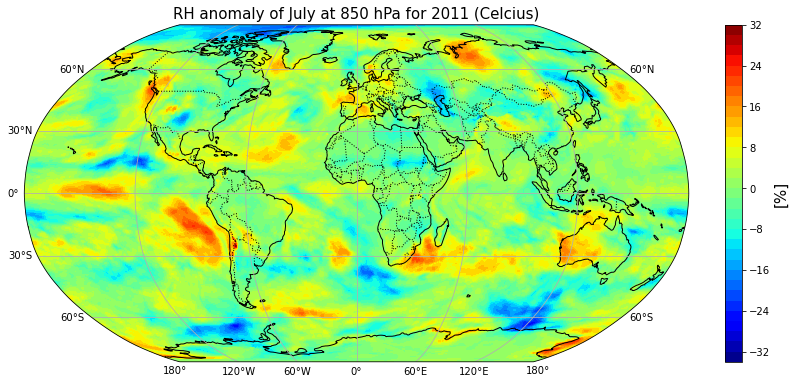

In [21]:
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point
import cartopy.feature as cfeat

plt.figure(figsize=(13,6.2))
rh_cyc, lon_cyc = add_cyclic_point(anomaly_jul, coord=lon_) #Changing the longitude from 0º – 360º to -180 – 180 จาก https://geoclimatologyblog.wordpress.com/page/2/


ax = plt.subplot(111, projection=ccrs.Robinson())
max_ = np.round((np.max(rh_cyc)))+2
min_ = max_*(-1)
#max_ =9
#min_ = -8
vstep = 2.0
levels = np.arange(min_, max_, vstep)
rh_ = ax.contourf(lon_cyc,\
                                 lat_,\
                                 rh_cyc,\
                                 levels,\
                                 transform=ccrs.PlateCarree(),\
                                 cmap='jet')


ax.coastlines(resolution='110m', color='black', linewidth=1) #เพิ่มแนวชายฝั่งจาก pyplot
ax.add_feature(cfeat.BORDERS, linestyle=':') #เพิ่มขอบเขตประเทศจาก cartopy

#เซตค่าชื่อกริด การแสดงกริดเส้นโครง
gl = ax.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False

#พลอต color bar
# คำนวณมิติข้อมูล (height_of_image / width_of_image)
im_ratio = rh_cyc.shape[0]/rh_cyc.shape[1]
cbar = plt.colorbar(rh_,fraction=0.047*im_ratio)
cbar.set_label('[%]', fontsize=15)


plt.title('RH anomaly of July at 850 hPa for 2011 (Celcius)', fontsize=15)
plt.show()

### แปลผล
* ค่ามีทั้งบวกและลบ สนใจเฉพาะค่าที่สูง
* ค่าที่อยู่ใกล้ 0 แสดงว่ามีค่าใกล้เคียงระหว่างค่าเฉลี่ยเชิงภูมิอากาศวิทยากับปีที่สังเกตุ ประเทศไทยในเดือนกรกฎาคมปี 2011 ที่ระดับ 850 hPa พบว่ามีค่าไม่แตกต่างมากนักกับค่าเฉลี่ยความชื้นสัมพัทธ์เชิงภูมิอากาศวิทยา
* ทางตะวันออกของมหาสมุทรแปซิคใต้ ในบริเวณกระแสน้ำเย็นฮัมโบลด์ หรือ อีกชื่อกระแสน้ำเย็นเปรู พบว่าเป็นบริเวณที่มีความชื้นสัมพัทธ์สูงกว่าค่าเฉลี่ยทางภูมิอากาศวิทยาอย่างมาก จากการที่มีค่า anomaly เป็นค่า + ที่สูงมาก เช่นเดียวกันกับทางตะวันตกของทวีปออสเตรเลียและทางตะวันตกของสหรัฐอเมริกาและแคนาดา รวมถึงทางตะวันออกของตอนใต้ในทวีปแอฟริกาก็เช่นกัน
* ส่วนค่า anomaly ที่เป็นลบ แสดงถึงเดือนกรกฏาคม 2021 มีค่าความชื้นสัมพัทธ์ที่ต่ำกว่าค่าเฉลี่ยทางภูมิอากาศวิทยา พบได้ในทางตอนกลางของประเทศสหรัฐอเมริกา และทางตอนเหนือของทะเลสาบแคสเปียน เป็นต้น

#### ให้นิสิตทดลองทำ/ทดลองคิด
1. ทำการวิเคราะห์และแปลผล anomaly ของเดือนมกราคม ปี 2011แล้วทำการอภิปรายเปรียบเทียบกับค่า anomaly ของเดือนกรกฎาคมในเชิงภูมิศาสตร์
2. หากเป็นไปได้ นิสิตควรทำการดาวน์โหลดข้อมูล relative humidityในระดับที่ใกล้กับพื้นโลก surface relative humidity  เนื่องจากความชื้นมักจะกระจุกตัวใกล้ผิวโลก เนื่องจากน้ำหนักโมเลกุลของน้ำที่มีมาก 